In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("FIFA.csv")

In [4]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [5]:
df.shape

(17660, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

Our target variable is 'Overall' which is the total rating of the players. So let's promptly remove the features that won't be useful for our prediction.

- Initial Observations and Cleaning Plan

    - Unnecessary Columns
        - Photo, Flag, Club Logo: These URLs are irrelevant for analysis.
        - Best Overall Rating: Only 21 non-null values out of 17,660 → Drop.

    - Missing Values
        - Club, Body Type, Real Face, Position, Contract Valid Until: Some missing values.
        - Loaned From: Mostly empty, could be removed.
        - Joined: Many missing values, might need imputation.
        - Release Clause: Some missing values.

    - Data Type Issues
        - Value, Wage, Release Clause: Stored as strings with "€" → Convert to numerical.
        - Height & Weight: Convert "cm" and "kg" to numerical values.
        - Contract Valid Until: Convert to datetime.

    - Potential Fixes
        - Standardize column names.
        - Convert categorical columns into consistent values.
        - Handle missing values using mode/median where applicable.

In [7]:
df.drop(columns=['ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Loaned From','Best Overall Rating'], inplace=True)

In [8]:
df['Height'] = df['Height'].str.replace('cm','').astype(float)
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

In [9]:
def fix_currency(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('M','e6').replace('K','e3')
        return eval(value) if value else None
    return value

In [10]:
df['Value'] = df['Value'].apply(fix_currency)
df['Wage'] = df['Wage'].apply(fix_currency)
df['Release Clause'] = df['Release Clause'].apply(fix_currency)

In [11]:
df["Contract Valid Until"] = pd.to_datetime(df["Contract Valid Until"], errors="coerce")

In [12]:
cols_temp = ['Club', 'Body Type', 'Real Face', 'Position', 'Joined', 'Contract Valid Until']
for i in cols_temp:
    df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df['Release Clause'] = df['Release Clause'].fillna(df['Release Clause'].median())

In [14]:
df['Kit Number'] = df['Kit Number'].fillna(0)

In [15]:
df.isna().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Kit Number                  0
dtype: int64

In [16]:
df['Position'] = df['Position'].str.replace(r"<.*?>","",regex=True)

In [17]:
df = df.rename({'Preferred Foot':'Preferred_Foot',
                'International Reputation':'International_Reputation',
                'Weak Foot':'Weak_Foot',
                'Skill Moves':'Skill_Moves',
                'Work Rate':'Work_Rate',
                'Body Type':'Body_Type',
                'Real Face':'Real_Face',
                'Contract Valid Until':'Contract_Valid_Until',
                'Release Clause':'Release_Clause',
                'Kit Number':'Kit_Number'}, axis=1)

In [18]:
df.duplicated().sum()

np.int64(0)

Fixed almost all the early issues with the dataset. Now will move forward with further analysis and preprocessing. Outlier detection and removal will be our next step.

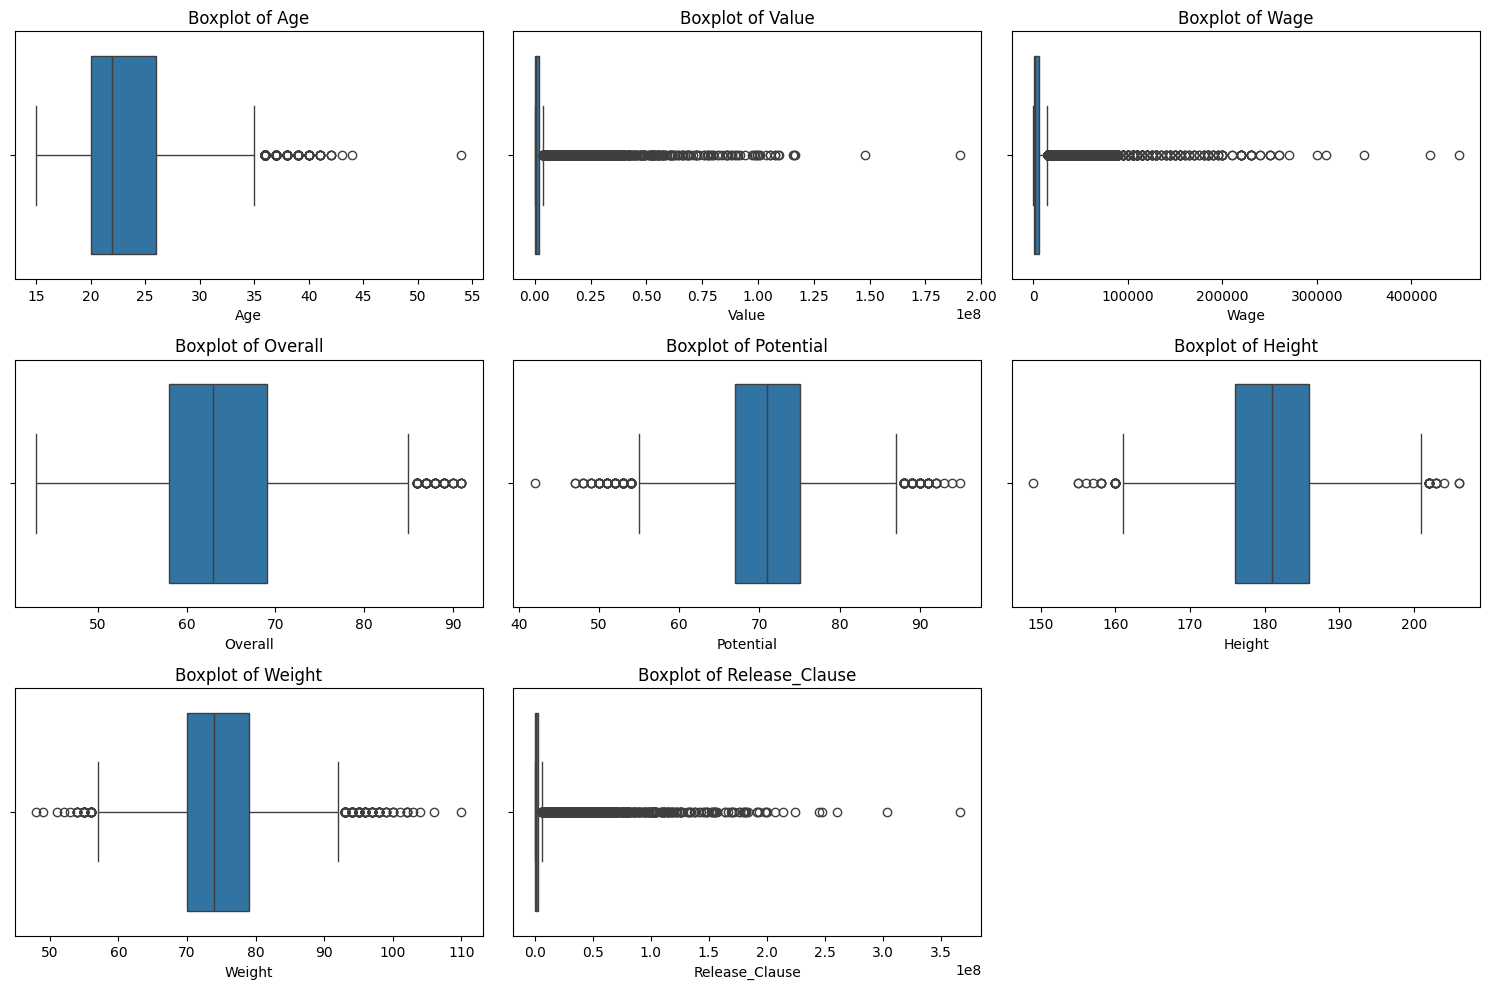

In [19]:
numerical_cols = ["Age", "Value", "Wage", "Overall", "Potential", "Height", "Weight", "Release_Clause"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

- Outlier Detection Insights

    - Value, Wage, and Release Clause show extreme outliers due to star players with massive salaries.
    - Height and Weight have some unusually high values but are expected in football.
    - Age has some very high values, likely due to veteran players.
    - Overall and Potential appear mostly normal, but a few players might have extreme ratings.

In [20]:
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [21]:
cols_temp = ['Value', 'Wage', 'Release_Clause', 'Weight']
for i in cols_temp:
    df = remove_outliers_iqr(df,i)

We used IQR for Weight because it had extreme outliers, likely due to incorrect or unusually high values. Height, however, showed a natural distribution with fewer extreme values, making IQR less necessary.

We didn't apply IQR on Age because veteran players (high age) are valid and not erroneous outliers. However, if we find unrealistic values (e.g., age > 50 in a professional league), we should reconsider.

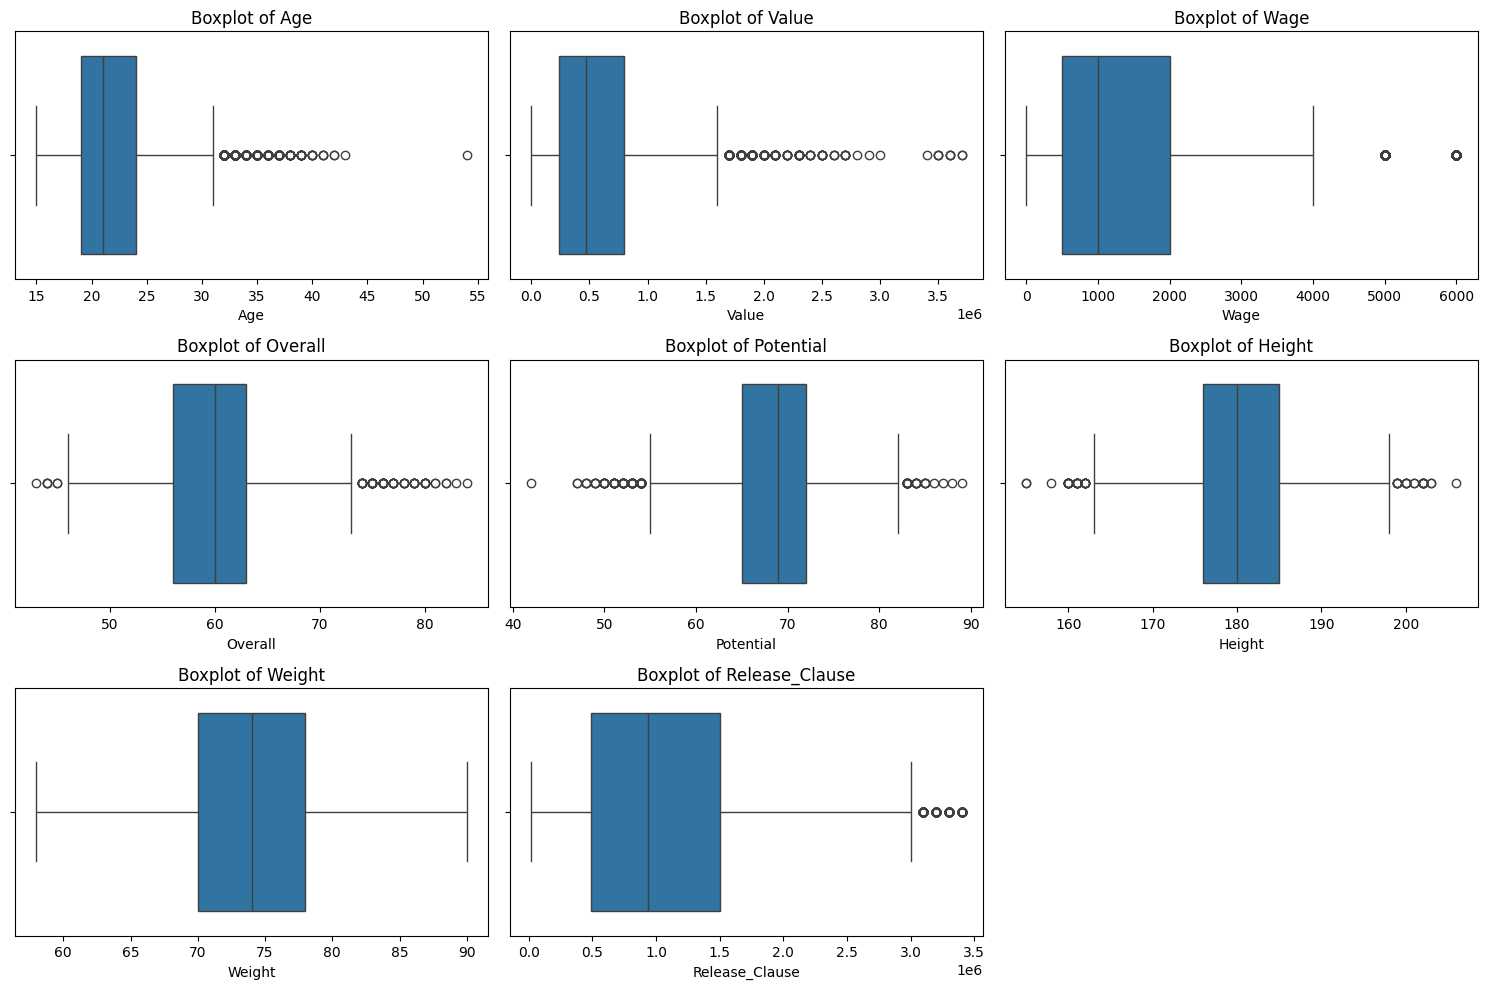

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [23]:
df.describe()

,Age,Overall,Potential,Value,Wage,Special,International_Reputation,Weak_Foot,Skill_Moves,Contract_Valid_Until,Height,Weight,Release_Clause,Kit_Number
count,12380.000000,12380.000000,12380.000000,1.238000e+04,12380.000000,12380.000000,12380.000000,12380.000000,12380.000000,12380,12380.000000,12380.000000,1.238000e+04,12380.000000
mean,22.097819,59.563489,68.422859,5.712263e+05,1487.778675,1442.196688,1.016236,2.815105,2.121567,2023-01-18 14:56:20.161551104,180.603312,73.764620,1.093497e+06,26.906220
min,15.000000,43.000000,42.000000,0.000000e+00,0.000000,749.000000,1.000000,1.000000,1.000000,2007-01-01 00:00:00,155.000000,58.000000,2.000000e+04,0.000000
25%,19.000000,56.000000,65.000000,2.400000e+05,500.000000,1346.000000,1.000000,2.000000,2.000000,2022-01-01 00:00:00,176.000000,70.000000,4.880000e+05,14.000000
50%,21.000000,60.000000,69.000000,4.750000e+05,1000.000000,1474.000000,1.000000,3.000000,2.000000,2023-01-01 00:00:00,180.000000,74.000000,9.350000e+05,24.000000
75%,24.000000,63.000000,72.000000,8.000000e+05,2000.000000,1600.000000,1.000000,3.000000,2.000000,2024-01-01 00:00:00,185.000000,78.000000,1.500000e+06,34.000000
max,54.000000,84.000000,89.000000,3.700000e+06,6000.000000,2129.000000,4.000000,5.000000,5.000000,2028-01-01 00:00:00,206.000000,90.000000,3.400000e+06,99.000000
std,4.260222,5.458900,5.338644,4.442677e+05,1352.512029,242.376463,0.156641,0.621255,0.625678,NaN,6.778332,6.424983,7.629521e+05,19.278085


In [24]:
df.describe(include=object)

,Nationality,Club,Preferred_Foot,Work_Rate,Body_Type,Real_Face,Position,Joined
count,12380,12380,12380,12380,12380,12380,12380,12380
unique,156,902,2,10,9,2,28,1501
top,England,Manchester United,Right,Medium/ Medium,Normal (170-185),No,SUB,"Jul 1, 2021"
freq,1070,231,9704,7888,4608,12092,5444,1385


Let's convert categorical data to numerical.

In [25]:
df['Work_Rate'] = df['Work_Rate'].str.extract(r'(\w+)/.*', expand=False)

In [26]:
df = df.drop(df[df.Work_Rate == 'N'].index)

In [27]:
df['Work_Rate'].value_counts()

Work_Rate
Medium    9247
High      2521
Low        545
Name: count, dtype: int64

In [28]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, df[i].nunique())

Nationality 156
Club 885
Preferred_Foot 2
Work_Rate 3
Body_Type 9
Real_Face 2
Position 28
Joined 1497


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from category_encoders import TargetEncoder

work_rate_order = [['Low', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=work_rate_order)
df['Work_Rate'] = encoder.fit_transform(df[['Work_Rate']])

one_hot_cols = ['Preferred_Foot', 'Body_Type', 'Real_Face', 'Position']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

target_encoder = TargetEncoder()

for col in ['Nationality', 'Club']:
    df[col] = target_encoder.fit_transform(df[col], df['Overall'])  # Encoding based on 'Overall' rating

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12313 entries, 162 to 17659
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         12313 non-null  int64         
 1   Nationality                 12313 non-null  float64       
 2   Overall                     12313 non-null  int64         
 3   Potential                   12313 non-null  int64         
 4   Club                        12313 non-null  float64       
 5   Value                       12313 non-null  float64       
 6   Wage                        12313 non-null  float64       
 7   Special                     12313 non-null  int64         
 8   International_Reputation    12313 non-null  float64       
 9   Weak_Foot                   12313 non-null  float64       
 10  Skill_Moves                 12313 non-null  float64       
 11  Work_Rate                   12313 non-null  float64      

In [30]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International_Reputation,Weak_Foot,...,Position_RCM,Position_RDM,Position_RES,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Position_SUB
162,35,62.220803,82,82,67.470320,0.0,0.0,2129,3.0,5.0,...,False,False,False,False,False,False,False,False,False,True
270,34,61.889473,75,75,59.445364,2600000.0,5000.0,2092,2.0,4.0,...,False,False,False,False,False,False,False,False,False,False
383,32,61.971119,80,80,67.470320,0.0,0.0,2065,1.0,4.0,...,False,False,False,False,False,False,False,False,False,False
435,32,61.444148,75,75,67.470320,0.0,0.0,2053,3.0,3.0,...,False,False,False,False,False,False,False,False,True,False
463,28,60.179640,79,79,67.470320,0.0,0.0,2047,2.0,3.0,...,False,False,False,False,False,False,False,False,False,False


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_cols = ['Age', 'Height', 'Weight', 'Overall', 'Potential']

df[std_cols] = scaler.fit_transform(df[std_cols])


In [32]:
df = df[df['Height'] > 0]  
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

df['Wage-to-Value_Ratio'] = df['Wage'] / df['Value'].replace(0, 1e-6)


In [33]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_cols = ['Value', 'Wage', 'Release_Clause', 'BMI', 'Wage-to-Value_Ratio']

df[min_max_cols] = min_max_scaler.fit_transform(df[min_max_cols])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5960 entries, 270 to 17659
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         5960 non-null   float64       
 1   Nationality                 5960 non-null   float64       
 2   Overall                     5960 non-null   float64       
 3   Potential                   5960 non-null   float64       
 4   Club                        5960 non-null   float64       
 5   Value                       5960 non-null   float64       
 6   Wage                        5960 non-null   float64       
 7   Special                     5960 non-null   int64         
 8   International_Reputation    5960 non-null   float64       
 9   Weak_Foot                   5960 non-null   float64       
 10  Skill_Moves                 5960 non-null   float64       
 11  Work_Rate                   5960 non-null   float64       

In [35]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Age',
 'Nationality',
 'Overall',
 'Potential',
 'Club',
 'Value',
 'Wage',
 'Special',
 'International_Reputation',
 'Weak_Foot',
 'Skill_Moves',
 'Work_Rate',
 'Height',
 'Weight',
 'Release_Clause',
 'Kit_Number',
 'BMI',
 'Wage-to-Value_Ratio']

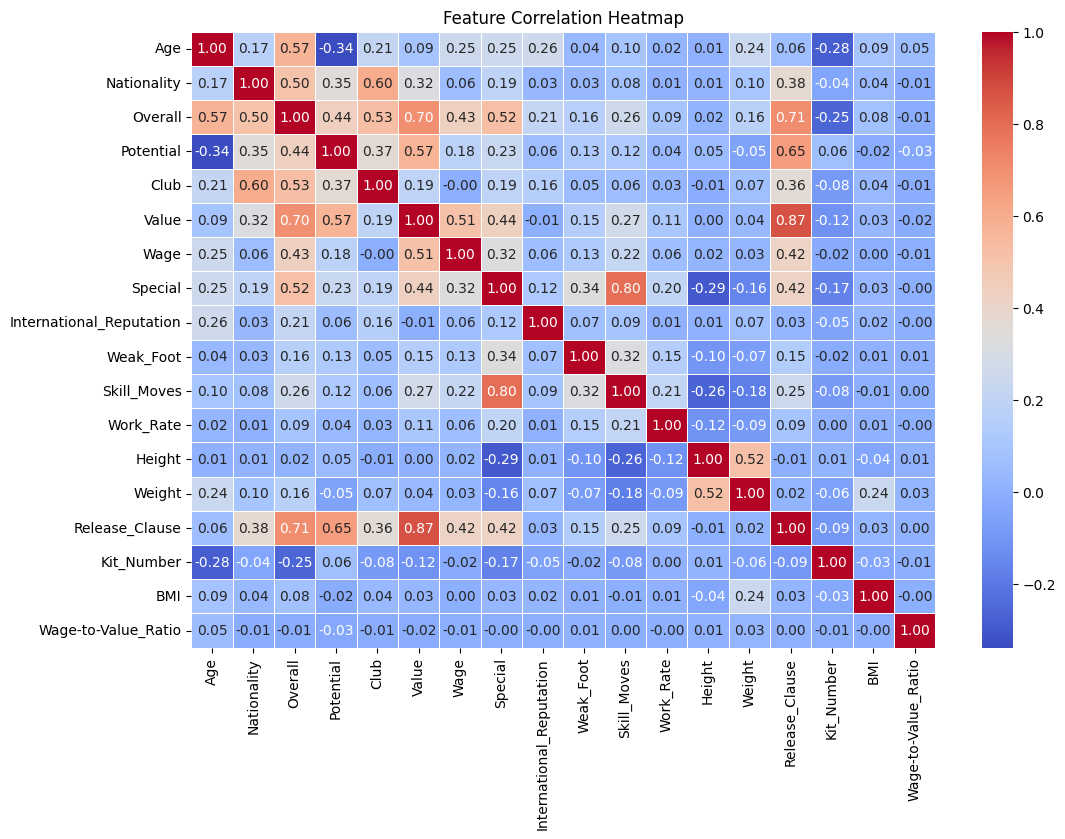

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [37]:
# Set threshold for high correlation
threshold = 0.85  

# Find feature pairs with correlation above the threshold
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature_name = corr_matrix.columns[i]
            correlated_features.add(feature_name)

# Drop them from the dataset
df.drop(columns=correlated_features, inplace=True)

print(f"Dropped features: {correlated_features}")


Dropped features: {'Release_Clause'}


In [38]:
numerical_cols.remove('Release_Clause')

In [39]:
low_variance_features = [col for col in df.columns if df[col].nunique() / len(df) < 0.01]
print("Low variance features:", low_variance_features)

Low variance features: ['Age', 'Overall', 'Potential', 'Wage', 'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate', 'Contract_Valid_Until', 'Height', 'Weight', 'Preferred_Foot_Right', 'Body_Type_Lean (170-185)', 'Body_Type_Lean (185+)', 'Body_Type_Normal (170-)', 'Body_Type_Normal (170-185)', 'Body_Type_Normal (185+)', 'Body_Type_Stocky (170-)', 'Body_Type_Stocky (170-185)', 'Body_Type_Stocky (185+)', 'Real_Face_Yes', 'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM', 'Position_GK', 'Position_LB', 'Position_LCB', 'Position_LCM', 'Position_LDM', 'Position_LF', 'Position_LM', 'Position_LS', 'Position_LW', 'Position_LWB', 'Position_RAM', 'Position_RB', 'Position_RCB', 'Position_RCM', 'Position_RDM', 'Position_RES', 'Position_RF', 'Position_RM', 'Position_RS', 'Position_RW', 'Position_RWB', 'Position_ST', 'Position_SUB']


In [40]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold (e.g., 0.01 means removing features with <1% variance)
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=['number']))

# Get column names that pass the threshold
selected_columns = df.select_dtypes(include=['number']).columns[selector.get_support()]

selected_columns
# Drop low-variance features
# df = df[selected_columns]

# print(f"Remaining features: {list(df.columns)}")


Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'International_Reputation', 'Weak_Foot', 'Skill_Moves',
       'Work_Rate', 'Height', 'Weight', 'Kit_Number'],
      dtype='object')

These don't provide much variance but have sure shot influence on the target variable.

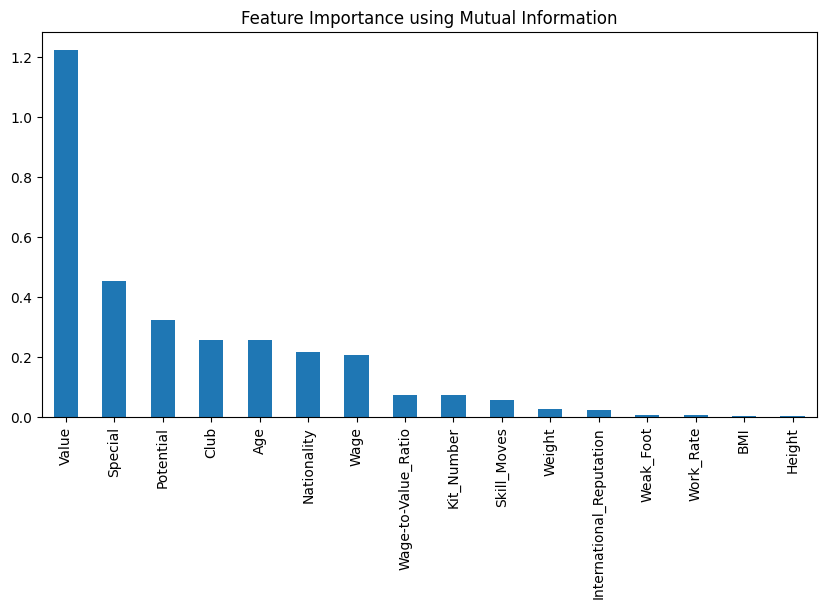

In [41]:
from sklearn.feature_selection import mutual_info_regression

# Compute MI for each feature
X = df[numerical_cols].drop(columns=['Overall'])  # Replace with actual target column
y = df['Overall']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
mi_scores.plot(kind="bar")
plt.title("Feature Importance using Mutual Information")
plt.show()


In [42]:
mi_scores

Value                       1.222251
Special                     0.453580
Potential                   0.320885
Club                        0.255326
Age                         0.255214
Nationality                 0.214867
Wage                        0.206727
Wage-to-Value_Ratio         0.072586
Kit_Number                  0.070769
Skill_Moves                 0.054011
Weight                      0.024421
International_Reputation    0.022405
Weak_Foot                   0.006623
Work_Rate                   0.003931
BMI                         0.002203
Height                      0.002079
dtype: float64

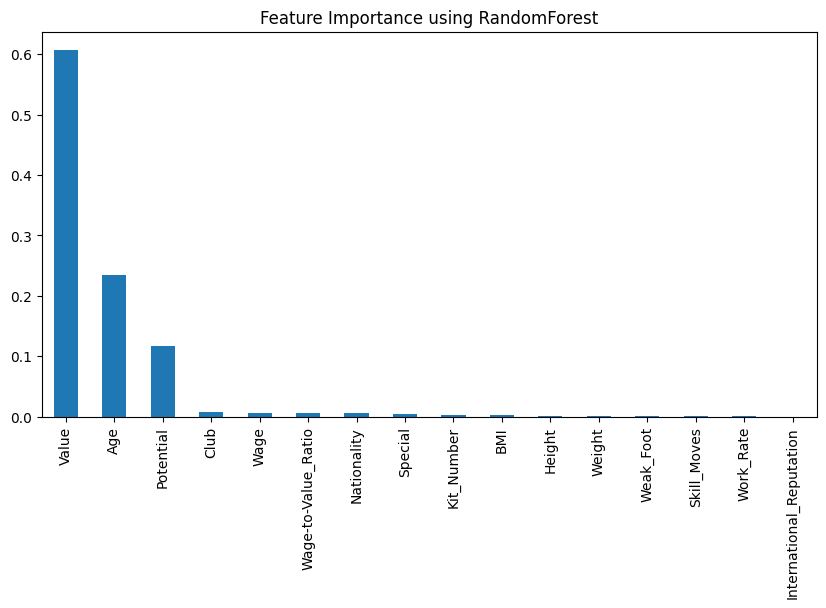

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
importance.plot(kind="bar")
plt.title("Feature Importance using RandomForest")
plt.show()

In [44]:
importance

Value                       0.606854
Age                         0.234598
Potential                   0.117446
Club                        0.007498
Wage                        0.006609
Wage-to-Value_Ratio         0.006390
Nationality                 0.005776
Special                     0.005175
Kit_Number                  0.002569
BMI                         0.002366
Height                      0.001587
Weight                      0.001465
Weak_Foot                   0.000622
Skill_Moves                 0.000614
Work_Rate                   0.000423
International_Reputation    0.000008
dtype: float64

In [45]:
df = df.drop(columns=['BMI','International_Reputation','Weak_Foot','Skill_Moves','Work_Rate','Kit_Number','Height','Weight'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5960 entries, 270 to 17659
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         5960 non-null   float64       
 1   Nationality                 5960 non-null   float64       
 2   Overall                     5960 non-null   float64       
 3   Potential                   5960 non-null   float64       
 4   Club                        5960 non-null   float64       
 5   Value                       5960 non-null   float64       
 6   Wage                        5960 non-null   float64       
 7   Special                     5960 non-null   int64         
 8   Joined                      5960 non-null   object        
 9   Contract_Valid_Until        5960 non-null   datetime64[ns]
 10  Preferred_Foot_Right        5960 non-null   bool          
 11  Body_Type_Lean (170-185)    5960 non-null   bool          

In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
from datetime import datetime

df['Years_since_joined'] = datetime.now().year - pd.to_datetime(df['Joined']).dt.year

df['Remaining_Contract_Years'] = (df['Contract_Valid_Until'].dt.year - datetime.now().year).clip(lower=0)

df.drop(['Joined', 'Contract_Valid_Until'], axis=1, inplace=True)

In [49]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [50]:
df['Remaining_Contract_Years'].value_counts()

Remaining_Contract_Years
0    5573
1     282
2     104
3       1
Name: count, dtype: int64

We keep them as free agents.

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Overall'])
y = df['Overall']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

y_pred = model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.23066934562395952
RMSE: 0.30658376299319823
R²: 0.909745249355602


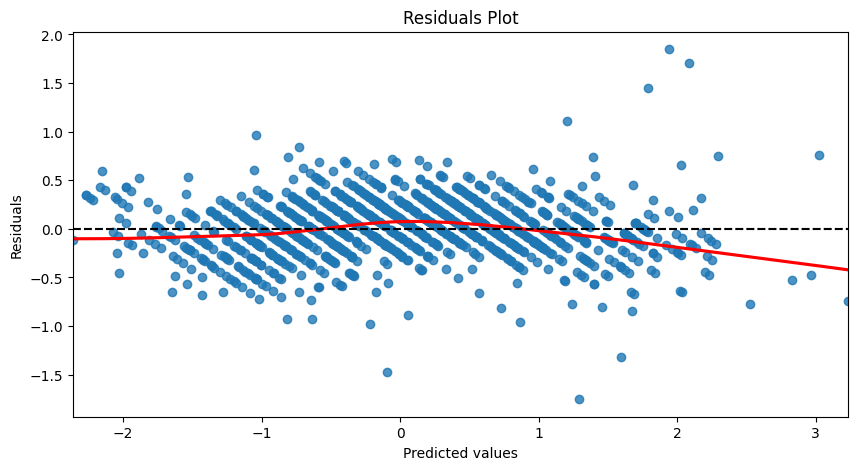

In [54]:
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred_poly = model.predict(x_test_poly)

print("R² (Polynomial):", r2_score(y_test, y_pred_poly))

R² (Polynomial): 0.9339475708438894


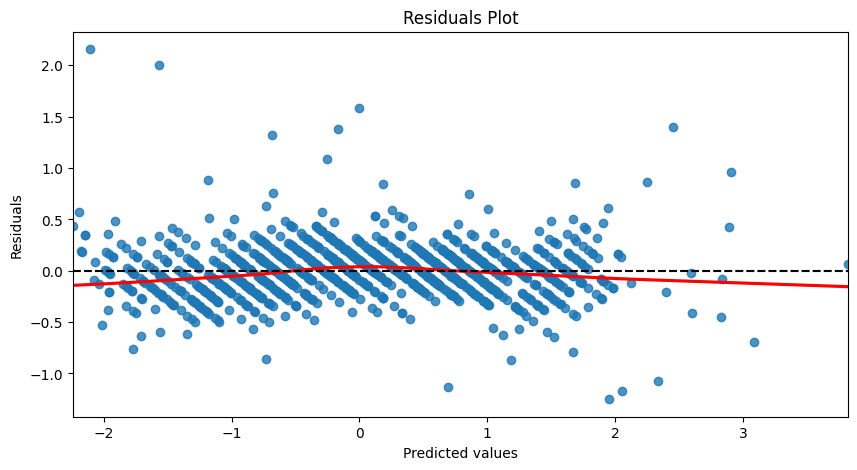

In [62]:
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_poly, y=y_test - y_pred_poly, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)  # Adjust depth to prevent overfitting
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_tree))


Decision Tree R²: 0.9372070032102933


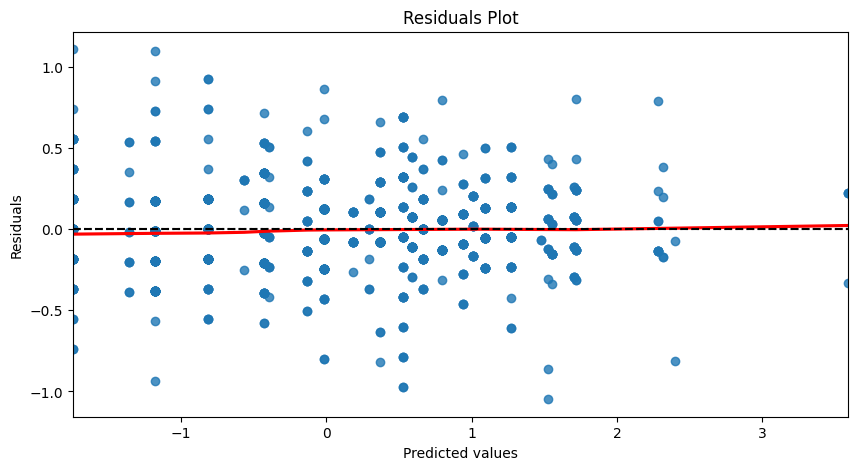

In [64]:
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_tree, y=y_test - y_pred_tree, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()